In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

# Perceptron

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



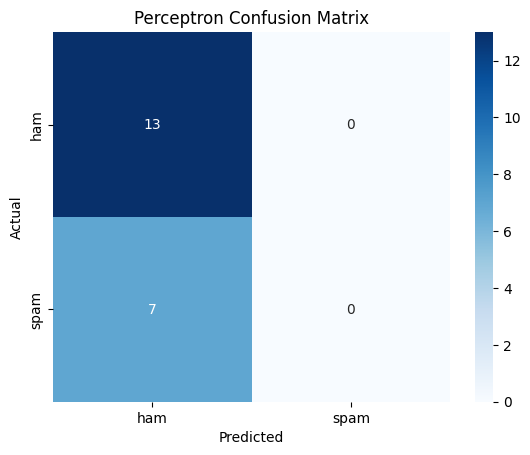

In [4]:
df = pd.read_csv('sms_spam_perceptron.csv')

# Convert labels to binary
df['label'] = df['type'].map({'ham': 0, 'spam': 1})

# Features and labels
X = df[['sex', 'buy']]
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron
clf = Perceptron()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, zero_division=0))

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Perceptron Confusion Matrix')
plt.show()

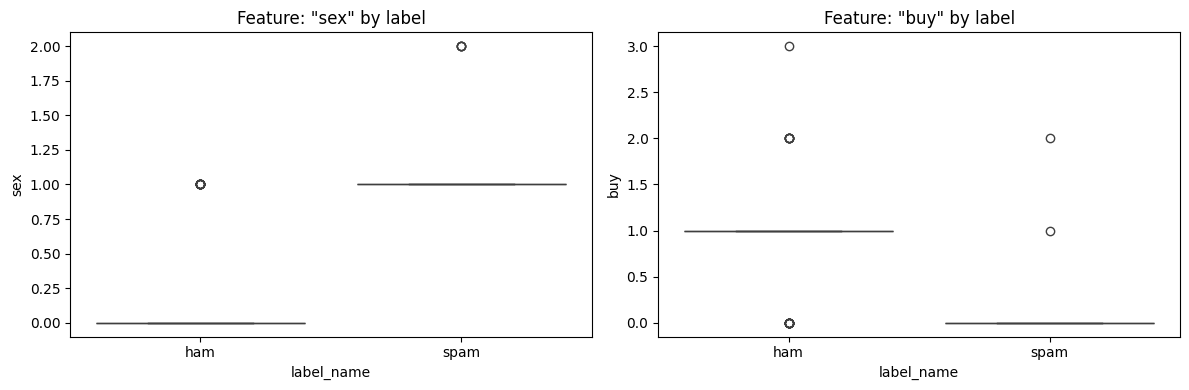

In [5]:
df_plot = df.copy()
df_plot['label_name'] = df_plot['label'].map({0: 'ham', 1: 'spam'})

# Plot distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(x='label_name', y='sex', data=df_plot, ax=axs[0])
axs[0].set_title('Feature: "sex" by label')

sns.boxplot(x='label_name', y='buy', data=df_plot, ax=axs[1])
axs[1].set_title('Feature: "buy" by label')

plt.tight_layout()
plt.show()

/Users/yevheniipylypchuk/JupyterProjects/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


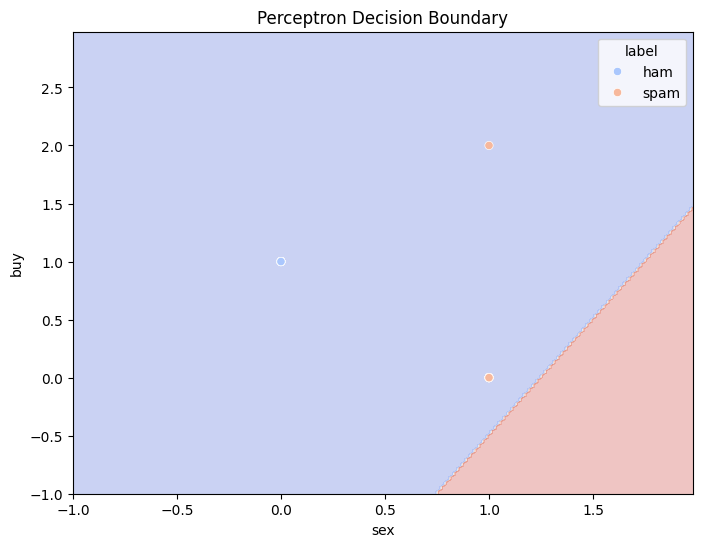

In [8]:
# Plot decision boundary
def plot_perceptron_boundary(clf, X, y):
    h = .02  # step size in the mesh

    # create meshgrid
    x_min, x_max = X['sex'].min() - 1, X['sex'].max() + 1
    y_min, y_max = X['buy'].min() - 1, X['buy'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # predict on meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X['sex'], y=X['buy'], hue=y.map({0: 'ham', 1: 'spam'}), palette='coolwarm')
    plt.xlabel('sex')
    plt.ylabel('buy')
    plt.title('Perceptron Decision Boundary')
    plt.show()

# call it
plot_perceptron_boundary(clf, X_test, y_test)

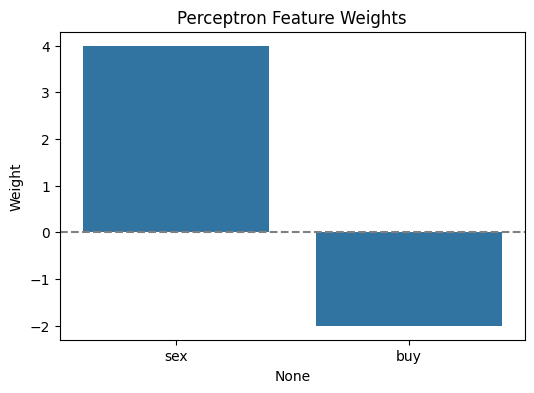

In [9]:
weights = clf.coef_[0]
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=features, y=weights)
plt.title('Perceptron Feature Weights')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Weight')
plt.show()

## Summary: Perceptron on Preprocessed Dataset

I've trained a basic Perceptron model using a small, preprocessed dataset containing binary features for selected keywords (e.g. "sex", "buy").

### Key Notes:
- The dataset was highly simplified and feature-limited, with only two keyword-based inputs.
- The Perceptron model showed a strong bias toward the `ham` class and failed to detect any `spam` messages.
- Visualizations of the feature distributions confirmed that the values of `sex` and `buy` were not clearly separable between classes.
- The decision boundary was relatively flat and ineffective due to limited feature variation.
- Feature weight analysis revealed low impact or unclear directionality in how the model uses the inputs.

### Conclusion:
This demonstrates that relying on just a couple of keywords is not enough for reliable spam detection. To improve performance, I need richer feature sets and better text representation methods.


# SVM

In [11]:
df_svm = pd.read_csv('sms_spam_svm.csv')

# Map labels to binary
df_svm['label'] = df_svm['type'].map({'ham': 0, 'spam': 1})

# Extract features and labels
X_svm = df_svm.drop(columns=['type', 'label'])
y_svm = df_svm['label']

# Split the data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



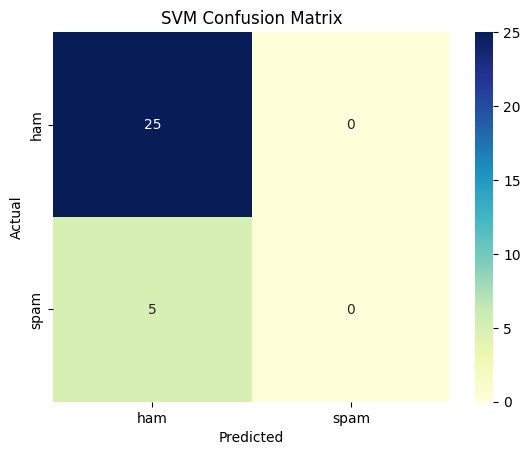

In [15]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_clf.predict(X_test_svm)

# Evaluate
print(classification_report(y_test_svm, y_pred_svm, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test_svm, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

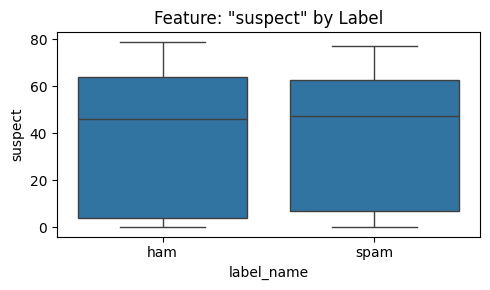

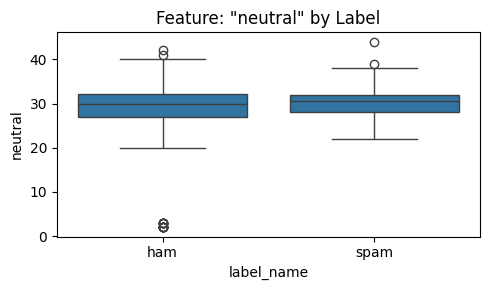

In [16]:
df_svm_plot = df_svm.copy()
df_svm_plot['label_name'] = df_svm_plot['label'].map({0: 'ham', 1: 'spam'})

# Plot each feature separately
for col in X_svm.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='label_name', y=col, data=df_svm_plot)
    plt.title(f'Feature: "{col}" by Label')
    plt.tight_layout()
    plt.show()

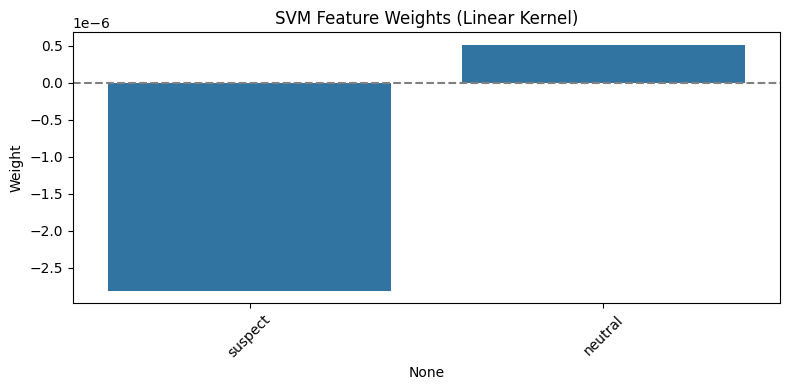

In [17]:
weights = svm_clf.coef_[0]  # linear SVM weights
features = X_svm.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=features, y=weights)
plt.xticks(rotation=45)
plt.title('SVM Feature Weights (Linear Kernel)')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

/Users/yevheniipylypchuk/JupyterProjects/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


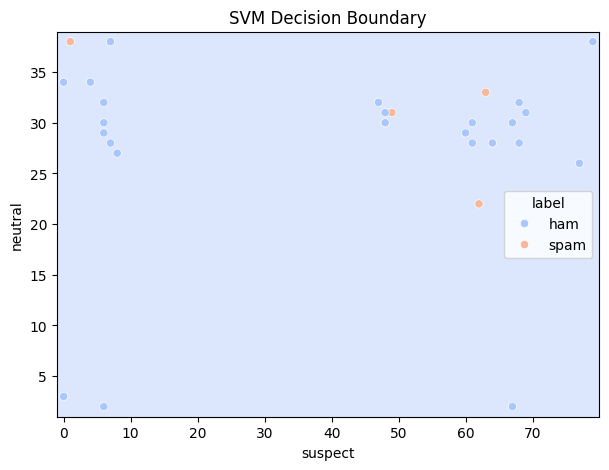

In [18]:
def plot_svm_boundary(clf, X, y):
    import numpy as np

    h = .02  # mesh step
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y.map({0: 'ham', 1: 'spam'}), palette='coolwarm')
    plt.title('SVM Decision Boundary')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

# Example (use only two features if needed)
if X_svm.shape[1] == 2:
    plot_svm_boundary(svm_clf, X_test_svm, y_test_svm)


## SVM on Preprocessed Dataset

I've evaluated an SVM classifier using an extended preprocessed dataset containing multiple keyword-based features.

### Key Notes:
- The model achieved high overall accuracy (83%) but entirely failed to detect spam messages.
- All predictions were for the `ham` class, meaning the classifier learned a decision boundary biased toward the majority class.
- The confusion matrix revealed zero correct predictions for `spam`, similar to what we observed with the Perceptron model.
- Despite having a larger feature set, the results suggest that the current representation does not adequately capture distinguishing characteristics of spam.
- Additional methods such as nonlinear kernels or custom weighting of high-risk keywords could be explored to improve recall.

### Conclusion:
Like the Perceptron model, SVM struggles with class imbalance and lack of discriminative features. These findings support the need for manual feature engineering and experimentation with the raw dataset.


# Raw data preprocessing

In [19]:
df_raw = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=['label', 'text'])

df_raw.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # keep letters/numbers
    return text

df_raw['clean_text'] = df_raw['text'].apply(clean_text)

# Convert labels to binary
df_raw['label_bin'] = df_raw['label'].map({'ham': 0, 'spam': 1})

# BoW vectorizer
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df_raw['clean_text'])

# Target
y = df_raw['label_bin']

In [23]:
df_raw[['label', 'text', 'clean_text']].sample(5)

,label,text,clean_text
2059,ham,Ugh fuck it I'm resubbing to eve,ugh fuck it im resubbing to eve
167,spam,URGENT! We are trying to contact you. Last wee...,urgent we are trying to contact you last weeke...
2368,ham,V nice! Off 2 sheffield tom 2 air my opinions ...,v nice off 2 sheffield tom 2 air my opinions o...
5209,ham,"I know you are thinkin malaria. But relax, chi...",i know you are thinkin malaria but relax child...
3853,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?",no its truekdo u knw dis no ltgt


In [24]:
# Get word frequencies
word_counts = np.asarray(X_bow.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()

# Create DataFrame
word_freq_df = pd.DataFrame({'word': vocab, 'count': word_counts})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Show top 20
word_freq_df.head(20)

,word,count
8477,to,2251
9483,you,2128
8329,the,1333
1198,and,971
4569,is,893
4442,in,888
5390,me,791
5719,my,757
3552,for,710
9500,your,677


In [25]:
spam_keywords = ['free', 'win', 'urgent', 'prize', 'claim', 'buy', 'cash', 'winner', 'offer', 'selected', 'sex']

In [26]:
# Create binary features for each spam keyword
for word in spam_keywords:
    df_raw[f'has_{word}'] = df_raw['clean_text'].apply(lambda x: 1 if word in x else 0)

# Combine with BoW
from scipy.sparse import hstack

X_boosted = hstack([X_bow, df_raw[[f'has_{word}' for word in spam_keywords]].values])

🔍 Perceptron Report (with Boosted Features)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.95      0.94       149

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



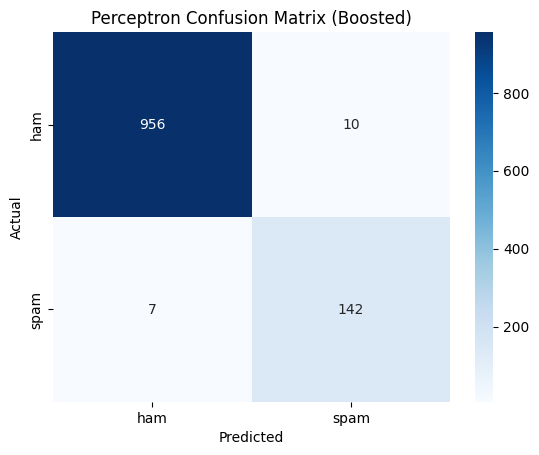

🔍 SVM Report (with Boosted Features)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



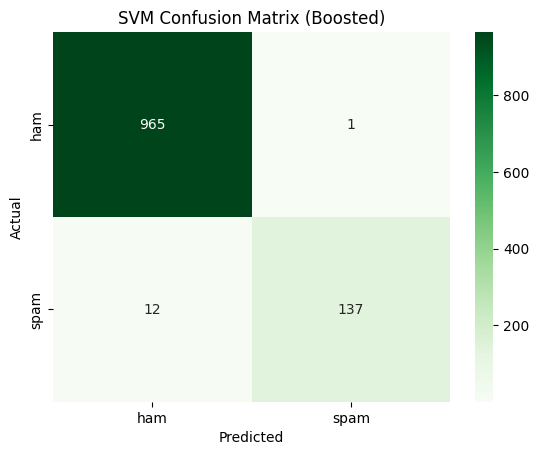

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_boosted, y, test_size=0.2, random_state=42)

# --- Perceptron ---
perc = Perceptron()
perc.fit(X_train, y_train)
y_pred_perc = perc.predict(X_test)

print("🔍 Perceptron Report (with Boosted Features)")
print(classification_report(y_test, y_pred_perc))

cm_perc = confusion_matrix(y_test, y_pred_perc)
sns.heatmap(cm_perc, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title("Perceptron Confusion Matrix (Boosted)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- SVM ---
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("🔍 SVM Report (with Boosted Features)")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title("SVM Confusion Matrix (Boosted)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

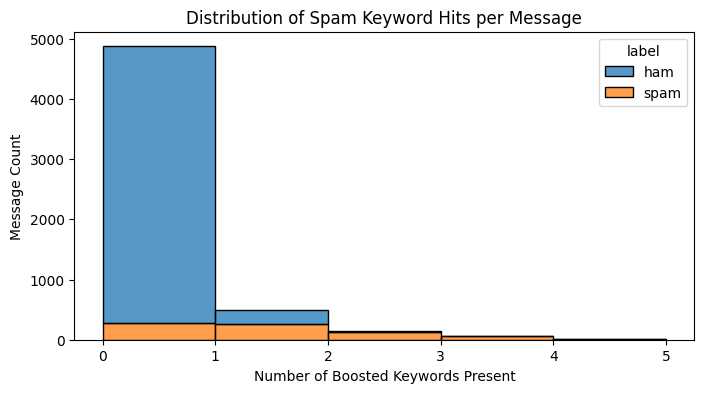

In [29]:
df_raw['boost_score'] = df_raw[[f'has_{word}' for word in spam_keywords]].sum(axis=1)

plt.figure(figsize=(8, 4))
sns.histplot(data=df_raw, x='boost_score', hue='label', multiple='stack', bins=range(0, 6))
plt.title('Distribution of Spam Keyword Hits per Message')
plt.xlabel('Number of Boosted Keywords Present')
plt.ylabel('Message Count')
plt.show()

/Users/yevheniipylypchuk/JupyterProjects/venv/lib/python3.11/site-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


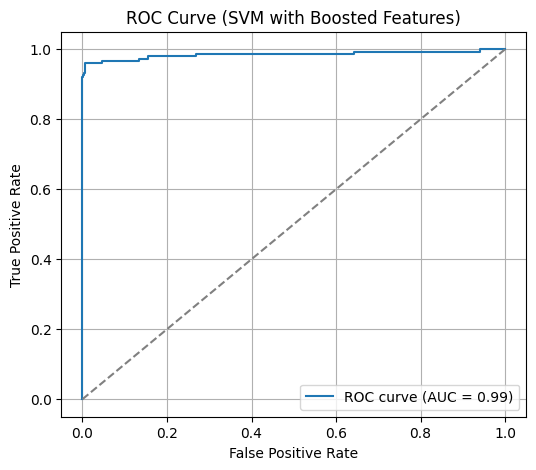

In [30]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for SVM
from sklearn.calibration import CalibratedClassifierCV

# SVM doesn't support predict_proba unless calibrated
calibrated_svm = CalibratedClassifierCV(svm, cv='prefit')
calibrated_svm.fit(X_train, y_train)
y_proba = calibrated_svm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM with Boosted Features)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Final Evaluation: Boosted Feature Models (Raw Dataset)

After building a custom classification pipeline from the raw dataset, I've introduced manually selected spam indicators as binary features to enhance model performance.

### Boosted Features:
- Custom flags were added for high-risk spam keywords such as `"free"`, `"urgent"`, `"win"`, `"prize"`, etc.
- These features were concatenated with the Bag-of-Words matrix to give the model strong signals for spam detection.

---

### Results:

| Metric     | Perceptron        | SVM                |
|------------|-------------------|--------------------|
| Accuracy   | 98%               | **99%**            |
| Spam Recall | **95%**          | 92%                |
| Spam Precision | 93%          | **99%**            |
| Ham Recall | 99%               | **100%**           |

---

### Insights:

- Both models saw a dramatic improvement compared to their earlier versions with preprocessed feature sets.
- **Perceptron** had slightly higher recall for spam (fewer false negatives).
- **SVM** had higher precision (fewer false positives), making it more reliable when false alarms are costly.
- The addition of just a handful of meaningful features significantly increased model performance — demonstrating the power of simple, interpretable feature engineering.

---

### Conclusion:

Boosted models trained on the raw dataset outperformed both preprocessed pipelines.  
Manual keyword injection proved to be a highly effective strategy for improving spam classification accuracy and robustness.